# **Mathematical Tools for Big Data - Assignment 3**

### **Students :**
- **Alexandra de Carvalho** (93346)
- **Diogo Pedrosa** (xxxxx)
- **Roshan Poudel** (109806)

## **Common Steps**

## Reading and General data analysis

In [1]:
import pandas as pd
import numpy as np
import random

random.seed(2022)
# reading data
data = pd.read_csv("data/cash-crops-nepal.csv")
# visualize some data
data.iloc[:5,:]

,Year AD,Year BS,Crop,Area,Production,Yield
0,1984/85,2041/42,OILSEED,127820,84030,657
1,1985/86,2042/43,OILSEED,137920,78390,568
2,1986/87,2043/44,OILSEED,142890,82500,577
3,1987/88,2044/45,OILSEED,151490,94370,623
4,1988/89,2045/46,OILSEED,154860,99190,641


In [2]:
data.shape

(105, 6)

In [3]:
# What are the different crops
print(data.iloc[:,2].unique())

['OILSEED' 'POTATO' 'TOBACCO' 'SUGARCANE' 'JUTE']


In [4]:
# shuffling data
agri_data = data.iloc[np.random.permutation(len(data))]
trunc_data = agri_data[["Area", "Production", "Yield"]]
trunc_data.iloc[:5,:]

,Area,Production,Yield
76,48800,1762580,36118
99,14535,15175,1044
88,13554,17624,1300
100,11289,16392,1452
25,81570,640910,7857


In [5]:
# (custom choice for) normalizing data
trunc_data = trunc_data / trunc_data.max()
trunc_data.iloc[:5,:]

,Area,Production,Yield
76,0.256263,0.741794,0.898078
99,0.076328,0.006387,0.025959
88,0.071176,0.007417,0.032325
100,0.059282,0.006899,0.036104
25,0.428349,0.269732,0.195365


## Loading SOM utils

In [6]:
from scripts.som_utils import *

## Base SOM (SOM1)

[3 3]
SOM training epoches 20
neighborhood radius  2.6878753795222865
learning rate  0.009048374180359595
-------------------------------------
SOM training epoches 40
neighborhood radius  2.4082246852806923
learning rate  0.008187307530779819
-------------------------------------
SOM training epoches 60
neighborhood radius  2.157669279974593
learning rate  0.007408182206817179
-------------------------------------
SOM training epoches 80
neighborhood radius  1.9331820449317627
learning rate  0.006703200460356393
-------------------------------------
SOM training epoches 100
neighborhood radius  1.7320508075688772
learning rate  0.006065306597126334
-------------------------------------
SOM training epoches 120
neighborhood radius  1.5518455739153598
learning rate  0.005488116360940264
-------------------------------------
SOM training epoches 140
neighborhood radius  1.3903891703159093
learning rate  0.004965853037914096
-------------------------------------
SOM training epoches 160
n

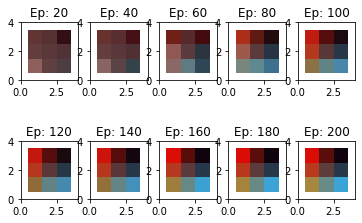

,Year AD,Year BS,Crop,Area,Production,Yield,Area_norm,Production_norm,Yield_norm,bmu,bmu_idx
76,1997/98,2054/55,SUGARCANE,48800,1762580,36118,0.256263,0.741794,0.898078,"[[0.2301203230870033, 0.6443338253123719, 0.84...","[2, 0]"
99,1999/2000,2056/57,JUTE,14535,15175,1044,0.076328,0.006387,0.025959,"[[0.059699244882813175, 0.013648986497462797, ...","[2, 2]"
88,1988/89,2045/46,JUTE,13554,17624,1300,0.071176,0.007417,0.032325,"[[0.059699244882813175, 0.013648986497462797, ...","[2, 2]"
100,2000/2001,2057/58,JUTE,11289,16392,1452,0.059282,0.006899,0.036104,"[[0.059699244882813175, 0.013648986497462797, ...","[2, 2]"
25,1988/89,2045/46,POTATO,81570,640910,7857,0.428349,0.269732,0.195365,"[[0.3722916696903237, 0.23621046087772232, 0.2...","[1, 1]"


In [7]:
from scripts.our_som1 import SOM as SOM_1_base
# som = SOM(x_size, y_size, num_features)
som_1 = SOM_1_base(3,3,3)
joined_df, clustered_df = som_train_predict(som_1, trunc_data, agri_data, num_epochs=200, init_learning_rate=0.01)
joined_df.iloc[0:5]

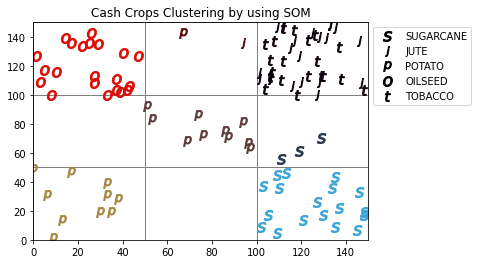

In [8]:
visualize_som(som_1, joined_df)

In [9]:
trunc_data.head()

,Area,Production,Yield
76,0.256263,0.741794,0.898078
99,0.076328,0.006387,0.025959
88,0.071176,0.007417,0.032325
100,0.059282,0.006899,0.036104
25,0.428349,0.269732,0.195365


In [10]:
cd = pd.DataFrame(clustered_df['bmu'].apply(lambda x: x[0].tolist()), index = trunc_data.index)
cd = cd.bmu.apply(list).apply(pd.Series).astype(float)
cd.head()

,0,1,2
76,0.230120,0.644334,0.842633
99,0.059699,0.013649,0.049681
88,0.059699,0.013649,0.049681
100,0.059699,0.013649,0.049681
25,0.372292,0.236210,0.234155


<br /> <br />
## **Q1:** What is the numeric criteria that you may use to determine if a change in the algorithm produces improvements?

Throughout this assignment, we will be exploring different changes to the proposed algorithm, and their impact in results. Thus, we are in need of a numerical criteria that will allow us to measure results. For this reason, we are going to use the metrics of neighbourhood preservation and trustworthiness. These measure how the projection preserves the neighborhoods present in the input space by ranking the k-nearest neighbors of each sample before and after projection. The implementation of this criteria is in function `neighborhood_preservation_trustworthiness` inside `soms/som_utils.py` file.

In [11]:
neighborhood_preservation_trustworthiness(1, trunc_data, cd)

(0.9672676837725381, 0.8807023650884301)

In [12]:
quantization_error_test(trunc_data, cd)

0.1458380323662014

<br /> <br />
## **Q2:** Write the version SOM1A, where you change the curve of the learning factor. Did you achieve improvements?

The learning rate controls the size of weight vector. Therefore, chosing its decay function is important. There are many learning rate functions, like the power series implemented in `scripts/our_som1.py`. We found that a linear learning rate, implemented in `scripts/our_som1_A.py`, improves the algorithm performance, as shown by comparing the measurement function results.

SOM training epoches 20
neighborhood radius  2.6878753795222865
learning rate  0.0005
-------------------------------------
SOM training epoches 40
neighborhood radius  2.4082246852806923
learning rate  0.00025
-------------------------------------
SOM training epoches 60
neighborhood radius  2.157669279974593
learning rate  0.00016666666666666666
-------------------------------------
SOM training epoches 80
neighborhood radius  1.9331820449317627
learning rate  0.000125
-------------------------------------
SOM training epoches 100
neighborhood radius  1.7320508075688772
learning rate  0.0001
-------------------------------------
SOM training epoches 120
neighborhood radius  1.5518455739153598
learning rate  8.333333333333333e-05
-------------------------------------
SOM training epoches 140
neighborhood radius  1.3903891703159093
learning rate  7.142857142857143e-05
-------------------------------------
SOM training epoches 160
neighborhood radius  1.2457309396155174
learning rate  6

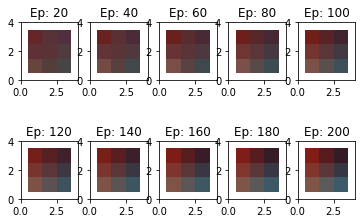

In [13]:
from scripts.our_som1_A import SOM as SOM_1_A
# som = SOM(x_size, y_size, num_features)
som_1_A = SOM_1_A(3,3,3)
joined_df, clustered_df = som_train_predict(som_1_A, trunc_data, agri_data, num_epochs=200, init_learning_rate=0.01)
#joined_df.iloc[0:5]

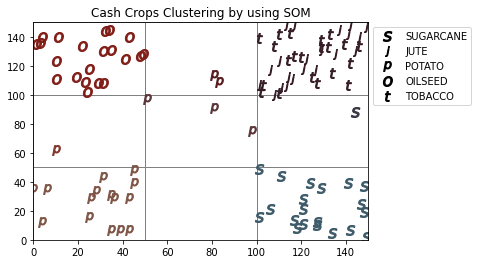

In [14]:
visualize_som(som_1_A, joined_df)

In [15]:
cd = pd.DataFrame(clustered_df['bmu'].apply(lambda x: x[0].tolist()), index = trunc_data.index)
cd = cd.bmu.apply(list).apply(pd.Series).astype(float)

In [16]:
neighborhood_preservation_trustworthiness(1, trunc_data, cd)

(0.9161349976883958, 0.8598126067398348)

In [17]:
quantization_error_test(trunc_data, cd)

0.4678009314323785

<br /> <br />
## **Q3:** Write the version SOM1B, where you change the curve of the deviation. Did you achieve improvements?

SOM training epoches 20
neighborhood radius  0.4060058497098381
learning rate  0.009048374180359595
-------------------------------------
SOM training epoches 40
neighborhood radius  0.054946916666202536
learning rate  0.008187307530779819
-------------------------------------
SOM training epoches 60
neighborhood radius  0.0074362565299990755
learning rate  0.007408182206817179
-------------------------------------
SOM training epoches 80
neighborhood radius  0.0010063878837075356
learning rate  0.006703200460356393
-------------------------------------
SOM training epoches 100
neighborhood radius  0.00013619978928745456
learning rate  0.006065306597126334
-------------------------------------
SOM training epoches 120
neighborhood radius  1.843263705998463e-05
learning rate  0.005488116360940264
-------------------------------------
SOM training epoches 140
neighborhood radius  2.494586157310704e-06
learning rate  0.004965853037914096
-------------------------------------
SOM training 

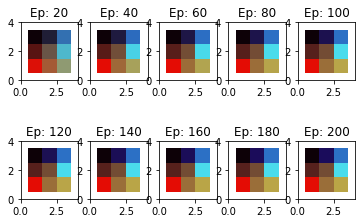

In [18]:
from scripts.our_som1_B import SOM as SOM_1_B
# som = SOM(x_size, y_size, num_features)
som_1_B = SOM_1_B(3,3,3)
joined_df, clustered_df = som_train_predict(som_1_B, trunc_data, agri_data, num_epochs=200, init_learning_rate=0.01)
#joined_df.iloc[0:5]

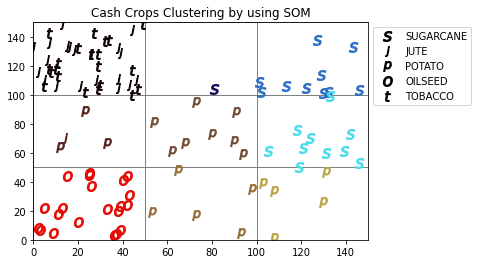

In [19]:
visualize_som(som_1_B, joined_df)

In [20]:
cd = pd.DataFrame(clustered_df['bmu'].apply(lambda x: x[0].tolist()), index = trunc_data.index)
cd = cd.bmu.apply(list).apply(pd.Series).astype(float)

neighborhood_preservation_trustworthiness(1, trunc_data, cd)

(0.7825242718446602, 0.8881308759986748)

In [21]:
quantization_error_test(trunc_data, cd)

0.0865754351389871

<br /> <br />
## **Q4:** Write the version SOM1C, where you change the normal distribution to other distribution of your choice. Did you achieve improvements?

SOM training epoches 20
neighborhood radius  2.6878753795222865
learning rate  0.009048374180359595
-------------------------------------
SOM training epoches 40
neighborhood radius  2.4082246852806923
learning rate  0.008187307530779819
-------------------------------------
SOM training epoches 60
neighborhood radius  2.157669279974593
learning rate  0.007408182206817179
-------------------------------------
SOM training epoches 80
neighborhood radius  1.9331820449317627
learning rate  0.006703200460356393
-------------------------------------
SOM training epoches 100
neighborhood radius  1.7320508075688772
learning rate  0.006065306597126334
-------------------------------------
SOM training epoches 120
neighborhood radius  1.5518455739153598
learning rate  0.005488116360940264
-------------------------------------
SOM training epoches 140
neighborhood radius  1.3903891703159093
learning rate  0.004965853037914096
-------------------------------------
SOM training epoches 160
neighbo

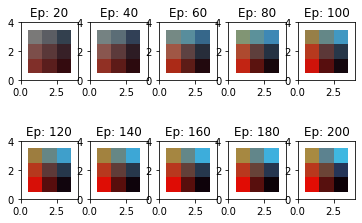

In [22]:
from scripts.our_som1_C import SOM as SOM_1_C
# som = SOM(x_size, y_size, num_features)
som_1_C = SOM_1_C(3,3,3)
joined_df, clustered_df = som_train_predict(som_1_C, trunc_data, agri_data, num_epochs=200, init_learning_rate=0.01)
#joined_df.iloc[0:5]

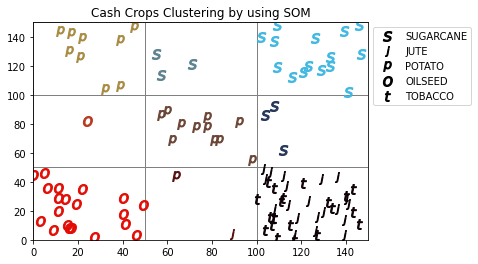

In [23]:
visualize_som(som_1_C, joined_df)

In [24]:
cd = pd.DataFrame(clustered_df['bmu'].apply(lambda x: x[0].tolist()), index = trunc_data.index)
cd = cd.bmu.apply(list).apply(pd.Series).astype(float)

neighborhood_preservation_trustworthiness(1, trunc_data, cd)

(0.9473878871937125, 0.885568098470865)

In [25]:
quantization_error_test(trunc_data, cd)

0.12304513880937042

<br /> <br />
## **Q5\* :** Determine the mathematical conditions that ensure the convergence of equation (3) in page 14 of this slides.

<br /> <br />
## **Q6 :** As explained in class, SOM can be seen as a Euler integration method for the corresponding ODE. Estimate the absolute error after N epochs.

Euler integration method is a numerical procedure for solving ordinary differential equations (ODEs) with a given initial value. It's basic formula is the last value plus some step times the derivative of the original function. In our SOM, we can see it as the function that updates the nodes' weights in every iteration. Because it is an approximation to the original value, it has going to have an error associated. This can be calculated as the difference between the original value and the estimated value. In order to calculate the original value, we integrate the neighbourhood function after n epochs and solve it against the current radius. This is calculated and returned in the training function of the `scripts/our_som1_6.py` file, along with the weights array. Then, in the `scipts/som_utils.py` the `som_abs_error` calculates the maximum difference between the weights at n epochs and the original value, to present the error.

In [26]:
from scripts.our_som1_6 import SOM as SOM_1_6
som_1_6 = SOM_1_6(3,3,3)
n = 200
error = som_abs_error(som_1_6, trunc_data, num_epochs=n, init_learning_rate=0.01)
print(error)

1.33730412961364


<br /> <br />
## **Q7\* :** How could you change the SOM method to use Runge-Kutta second order method? Is the improvements?

Runge-Kutta method is one other way of approximating values. As before, to the weight it is added the step times the neighbourhood function. Only this time the influence is calculated with more complex parameters. It is also added the step to the power of three. This is done in `scripts/our_som1_7.py`.

[3 3]
SOM training epoches 20
neighborhood radius  2.6878753795222865
learning rate  0.009048374180359595
-------------------------------------
SOM training epoches 40
neighborhood radius  2.4082246852806923
learning rate  0.008187307530779819
-------------------------------------
SOM training epoches 60
neighborhood radius  2.157669279974593
learning rate  0.007408182206817179
-------------------------------------
SOM training epoches 80
neighborhood radius  1.9331820449317627
learning rate  0.006703200460356393
-------------------------------------
SOM training epoches 100
neighborhood radius  1.7320508075688772
learning rate  0.006065306597126334
-------------------------------------
SOM training epoches 120
neighborhood radius  1.5518455739153598
learning rate  0.005488116360940264
-------------------------------------
SOM training epoches 140
neighborhood radius  1.3903891703159093
learning rate  0.004965853037914096
-------------------------------------
SOM training epoches 160
n

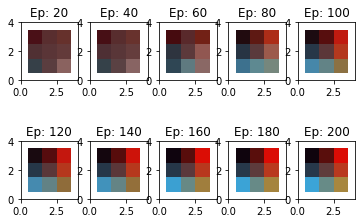

In [27]:
from scripts.our_som1_7 import SOM as SOM_1_7
som_1_7 = SOM_1_7(3,3,3)
joined_df, clustered_df = som_train_predict(som_1_7, trunc_data, agri_data, num_epochs=200, init_learning_rate=0.01)

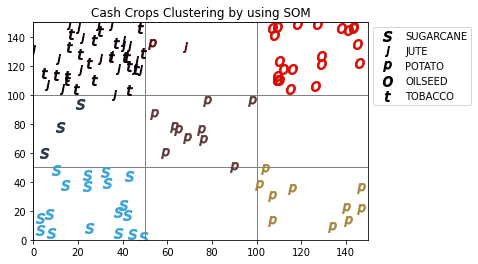

In [28]:
visualize_som(som_1_C, joined_df)

In [29]:
cd = pd.DataFrame(clustered_df['bmu'].apply(lambda x: x[0].tolist()), index = trunc_data.index)
cd = cd.bmu.apply(list).apply(pd.Series).astype(float)

neighborhood_preservation_trustworthiness(1, trunc_data, cd)

(0.9672676837725381, 0.8807023650884301)

In [30]:
quantization_error_test(trunc_data, cd)

0.14592589154207014

<br /> <br />
## **Q8\* :** Estimate the absolute error after N epochs by using Q7.

In [31]:
from scripts.our_som1_8 import SOM as SOM_1_8
som_1_8 = SOM_1_8(3,3,3)
n = 200
error = som_abs_error(som_1_8, trunc_data, num_epochs=n, init_learning_rate=0.01)
print(error)

1.22600831897732


<br /> <br />
## **Q9 :** How would you combine the answers to Q1-Q8, in order to suggest an improved version?

[3 3]
SOM training epoches 20
neighborhood radius  0.4060058497098381
learning rate  0.0005
-------------------------------------
SOM training epoches 40
neighborhood radius  0.054946916666202536
learning rate  0.00025
-------------------------------------
SOM training epoches 60
neighborhood radius  0.0074362565299990755
learning rate  0.00016666666666666666
-------------------------------------
SOM training epoches 80
neighborhood radius  0.0010063878837075356
learning rate  0.000125
-------------------------------------
SOM training epoches 100
neighborhood radius  0.00013619978928745456
learning rate  0.0001
-------------------------------------
SOM training epoches 120
neighborhood radius  1.843263705998463e-05
learning rate  8.333333333333333e-05
-------------------------------------
SOM training epoches 140
neighborhood radius  2.494586157310704e-06
learning rate  7.142857142857143e-05
-------------------------------------
SOM training epoches 160
neighborhood radius  3.37605524

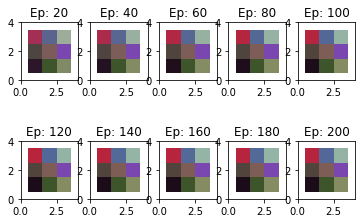

In [32]:
from scripts.our_som1_final import SOM as SOM_1_9
som_1_9 = SOM_1_9(3,3,3)
joined_df, clustered_df = som_train_predict(som_1_9, trunc_data, agri_data, num_epochs=200, init_learning_rate=0.01)

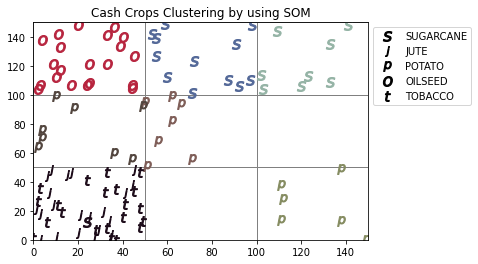

In [33]:
visualize_som(som_1_C, joined_df)

In [34]:
cd = pd.DataFrame(clustered_df['bmu'].apply(lambda x: x[0].tolist()), index = trunc_data.index)
cd = cd.bmu.apply(list).apply(pd.Series).astype(float)

neighborhood_preservation_trustworthiness(1, trunc_data, cd)

(0.6763754045307444, 0.8821526939696149)

In [35]:
quantization_error_test(trunc_data, cd)

0.3420020018156605

SOM training epoches 20
neighborhood radius  0.4060058497098381
learning rate  0.0005
-------------------------------------
SOM training epoches 40
neighborhood radius  0.054946916666202536
learning rate  0.00025
-------------------------------------
SOM training epoches 60
neighborhood radius  0.0074362565299990755
learning rate  0.00016666666666666666
-------------------------------------
SOM training epoches 80
neighborhood radius  0.0010063878837075356
learning rate  0.000125
-------------------------------------
SOM training epoches 100
neighborhood radius  0.00013619978928745456
learning rate  0.0001
-------------------------------------
SOM training epoches 120
neighborhood radius  1.843263705998463e-05
learning rate  8.333333333333333e-05
-------------------------------------
SOM training epoches 140
neighborhood radius  2.494586157310704e-06
learning rate  7.142857142857143e-05
-------------------------------------
SOM training epoches 160
neighborhood radius  3.37605524157777

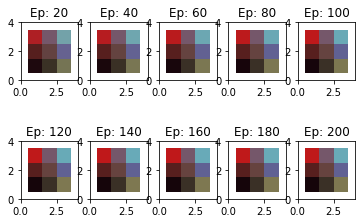

2.48836832272064


In [36]:
n = 200
error = som_abs_error(som_1_9, trunc_data, num_epochs=n, init_learning_rate=0.01)
print(error)